### Prepare stimuli in stereo with sync tone in the L channel
To syncrhonize the recording systems, each stimulus file goes in stereo, the L channel has the stimulus, and the R channel has a pure tone (500-5Khz).
This is done here, with the help of the rigmq.util.stimprep module
It uses (or creates) a dictionary of {stim_file: tone_freq} which is stored as a .json file for offline processing.

In [1]:
import socket
import os
import sys
import logging
import warnings
import numpy as np
import glob

from rigmq.util import stimprep as sp

# setup the logger
logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

# Check wich computer to decide where the things are mounted
comp_name=socket.gethostname()
logger.info('Computer: ' + comp_name)



2019-06-27 16:29:30,841 root         INFO     Computer: lookfar


In [2]:
exp_folder = os.path.abspath('/Users/zeke/experiment/birds')
bird = 'g3v3'
sess = 'acute_0'
stim_sf = 48000 # sampling frequency of the stimulus system

stim_folder = os.path.join(exp_folder, bird, 'SongData', sess)
glob.glob(os.path.join(stim_folder, '*.wav'))

['/Users/zeke/experiment/birds/g3v3/SongData/acute_0/bos.wav',
 '/Users/zeke/experiment/birds/g3v3/SongData/acute_0/bos_lo.wav']

In [3]:
from scipy.io import wavfile
from scipy.signal import resample


a_file = glob.glob(os.path.join(stim_folder, '*.wav'))[0]
in_sf, data = wavfile.read(a_file)

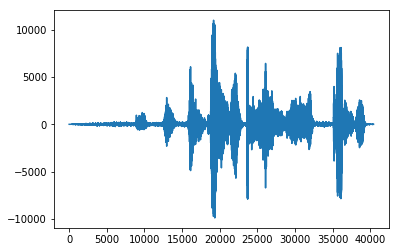

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(data)

In [5]:
data.dtype

dtype('int16')

In [6]:
np.iinfo(data.dtype).min

-32768

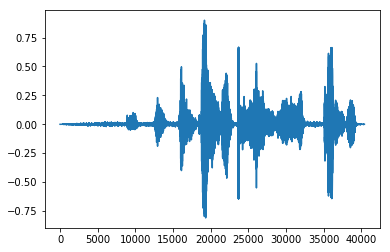

In [7]:
def normalize(x: np.array, max_amp: np.float=0.9)-> np.array:
    y = x.astype(np.float)
    y = y - np.mean(y)
    y = y / np.max(np.abs(y)) # if it is still of-centered, scale to avoid clipping in the widest varyng sign
    return y * max_amp

data_float = normalize(data)
plt.plot(data_float)

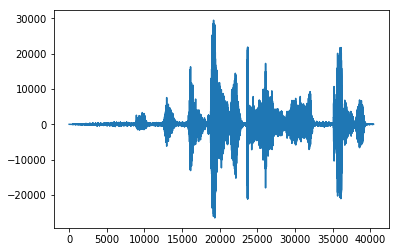

In [8]:
def int_range(x: np.array, dtype: np.dtype):
    min_int = np.iinfo(dtype).min
    max_int = np.iinfo(dtype).max

    if min_int==0: # for unsigned types shift everything
        x = x + np.min(x)
    y = x * max_int
    return y.astype(dtype)

data_int = int_range(data_float, data.dtype)
plt.plot(data_int)

In [9]:
data_tagged = sp.make_stereo_stim(a_file, 48000, tag_freq=1000)

2019-06-27 16:29:31,994 rigmq.util.stimprep INFO     Will resample from 40414 to 60621 sampes


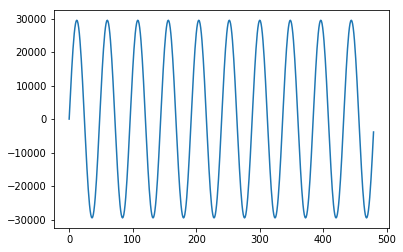

In [10]:
plt.plot(data_tagged[:480,1])

In [11]:
### Define stim_tags
There is a dictionary of {wav_file: tag_frequency} can be done by hand when there are few stimuli

SyntaxError: invalid syntax (<ipython-input-11-be1e1fd3ed18>, line 2)

In [14]:
stim_tags_dict = {'bos': 1000,
                  'bos-lo': 2000,
                  'bos-rev': 3000}

stims_list = list(stim_tags_dict.keys())
sp.create_sbc_stim(stims_list, stim_folder, stim_sf, stim_tag_dict=stim_tags_dict)


2019-06-27 16:36:59,810 rigmq.util.stimprep INFO     Processing /Users/zeke/experiment/birds/g3v3/SongData/acute_0/bos.wav
2019-06-27 16:36:59,813 rigmq.util.stimprep INFO     tag_freq = 1000
2019-06-27 16:36:59,815 rigmq.util.stimprep INFO     Will resample from 40414 to 60621 sampes
2019-06-27 16:36:59,831 rigmq.util.stimprep INFO     Saved to /Users/zeke/experiment/birds/g3v3/SongData/acute_0/sbc_stim/bos_tag.wav
2019-06-27 16:36:59,832 rigmq.util.stimprep INFO     Processing /Users/zeke/experiment/birds/g3v3/SongData/acute_0/bos-lo.wav
2019-06-27 16:36:59,833 rigmq.util.stimprep INFO     tag_freq = 2000
2019-06-27 16:36:59,835 rigmq.util.stimprep INFO     Will resample from 43906 to 65859 sampes
2019-06-27 16:36:59,876 rigmq.util.stimprep INFO     Saved to /Users/zeke/experiment/birds/g3v3/SongData/acute_0/sbc_stim/bos-lo_tag.wav
2019-06-27 16:36:59,876 rigmq.util.stimprep INFO     Processing /Users/zeke/experiment/birds/g3v3/SongData/acute_0/bos-rev.wav
2019-06-27 16:36:59,877 rig